In [3]:
import sys
import pandas as pd
import numpy as np
from scipy.io import whosmat
from scipy.io import loadmat
from io import BytesIO
import datetime

print(sys.executable)

g:\DIYguru\Data-Science-and-Engineering-Analytics\.venv\Scripts\python.exe


### Dataset Acquisition

In [ ]:
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0005.mat'))
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0006.mat'))
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0007.mat'))
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0018.mat'))

In [ ]:
file_path_B0005 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0005.mat'
file_path_B0006 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0006.mat'
file_path_B0007 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0007.mat'
file_path_B0018 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0018.mat'

data_B0005 = loadmat(file_path_B0005, struct_as_record=False, squeeze_me=True)
data_B0006 = loadmat(file_path_B0006, struct_as_record=False, squeeze_me=True)
data_B0007 = loadmat(file_path_B0007, struct_as_record=False, squeeze_me=True)
data_B0018 = loadmat(file_path_B0018, struct_as_record=False, squeeze_me=True)

# Access the struct
b0005 = data_B0005['B0005']
b0006 = data_B0006['B0006']
b0007 = data_B0007['B0007']
b0018 = data_B0018['B0018']

# Check what attributes (fields) this struct has
print('b0005 \n',dir(b0005))
print('b0006 \n',dir(b0006))
print('b0007 \n',dir(b0007))
print('b0018 \n',dir(b0018))

In [ ]:
print(b0005.cycle)
print(b0006.cycle)
print(b0007.cycle)
print(b0018.cycle)

In [ ]:
cycles = b0005.cycle
#cycles = b0006.cycle
#cycles = b0007.cycle
#cycles = b0018.cycle

print(type(cycles))

In [ ]:
print(len(cycles),"\n")

print(cycles[0],"\n")
print([col for col in dir(cycles[0]) if not col.startswith('_')],"\n") 

print(cycles[0].data,"\n")
print([col for col in dir(cycles[0].data) if not col.startswith('_')],"\n") 


In [ ]:
for i in range(len(cycles)):
    print("cycle",i,": ", cycles[i],"--",[col for col in dir(cycles[i]) if not col.startswith('_')])

In [ ]:
for i in range(len(cycles)):
    print("cycle",i,": ", cycles[i],"--",[col for col in dir(cycles[i].data) if not col.startswith('_')])

In [ ]:
for i in range(len(cycles)):
    print(f"cycle {i}: ambient_temperature = {cycles[i].ambient_temperature}")
    print(f"cycle {i}: time = {cycles[i].time}")
    print(f"cycle {i}: type = {cycles[i].type}")
    if cycles[i].type == 'charge':
        print(f"cycle {i}: Current_charge = {cycles[i].data.Current_charge}")
        print(f"cycle {i}: Current_measured = {cycles[i].data.Current_measured}")
        print(f"cycle {i}: Temperature_measured = {cycles[i].data.Temperature_measured}")
        print(f"cycle {i}: Time = {cycles[i].data.Time}")
        print(f"cycle {i}: Voltage_charge = {cycles[i].data.Voltage_charge}")
        print(f"cycle {i}: Voltage_measured = {cycles[i].data.Voltage_measured}")
    elif cycles[i].type == 'discharge':
        print(f"cycle {i}: Capacity = {cycles[i].data.Capacity}")
        print(f"cycle {i}: Current_load = {cycles[i].data.Current_load}")
        print(f"cycle {i}: Current_measured = {cycles[i].data.Current_measured}")
        print(f"cycle {i}: Temperature_measured = {cycles[i].data.Temperature_measured}")
        print(f"cycle {i}: Time = {cycles[i].data.Time}")
        print(f"cycle {i}: Voltage_load = {cycles[i].data.Voltage_load}")
        print(f"cycle {i}: Voltage_measured = {cycles[i].data.Voltage_measured}")
    elif cycles[i].type == 'impedance':
        print(f"cycle {i}: Battery_current = {cycles[i].data.Battery_current}")
        print(f"cycle {i}: Battery_impedance = {cycles[i].data.Battery_impedance}")
        print(f"cycle {i}: Current_ratio = {cycles[i].data.Current_ratio}")
        print(f"cycle {i}: Rct = {cycles[i].data.Rct}")
        print(f"cycle {i}: Re = {cycles[i].data.Re}")
        print(f"cycle {i}: Rectified_Impedance = {cycles[i].data.Rectified_Impedance}")
        print(f"cycle {i}: Sense_current = {cycles[i].data.Sense_current}")
    

- **def export_cycles_flattened(battery_name, cycles, export_filename, N=None):**
    - Defines a function to flatten and export battery cycle data.
    - `battery_name`: Name/identifier of the battery (used in output).
    - `cycles`: Iterable/list of cycle objects (each could be charge/discharge/impedance).
    - `export_filename`: Output filename for the CSV.
    - `N`: Number of cycles to process (if `None` or `0`, process all cycles).

- **rows = []**
    - Initialize an empty list to store each "flattened" row.

- **total_cycles = len(cycles) if N is None or N == 0 else min(N, len(cycles))**
    - Decide how many cycles to process: all if `N` not provided, or up to `N` cycles.

- **for i, cycle in enumerate(cycles):**
    - Loop over each cycle with index `i`.

- **if i >= total_cycles:**
    - If processed enough cycles, break out of loop.

- **cycle_type = getattr(cycle, 'type', None)**
    - Get the cycle's type attribute ('charge', 'discharge', 'impedance', etc).

- **if not hasattr(cycle, 'data'):**
    - If the cycle has no 'data' attribute, skip this cycle.

- **data = cycle.data**
    - Get the data object for the current cycle.

- **if cycle_type == 'charge':**
    - For charge cycles, define relevant columns.

- **columns = [...]**
    - Specify the list of attributes to extract, depending on the cycle type.

- **elif cycle_type == 'discharge':**
    - For discharge cycles, define different relevant columns.

- **elif cycle_type == 'impedance':**
    - For impedance cycles, yet another set of columns is defined.

- **else:**
    - If cycle type doesn't match any expected, skip the cycle.

- **arr_lens = []**
    - Prepare to find the length of each data array for the chosen columns.

- **for col in columns:**
    - For each column to extract:

- **arr = getattr(data, col, None)**
    - Get the array for the current column, if it exists.

- **if arr is not None and hasattr(arr, '__len__'):**
    - Check if the data exists and is an array with a length.

- **arr_lens.append(len(arr))**
    - Store the array length for this column.

- **if not arr_lens:**
    - If no arrays found, skip this cycle.

- **min_len = min(arr_lens)**
    - Find the (minimum) length of these arrays; ensures no index-out-of-bounds below.

- **for idx in range(min_len):**
    - Loop over array indices, up to the shortest array length (to keep data aligned).

- **row = { ... }**
    - Create a new dictionary to represent a single "flattened" row, including:
        - battery_name, cycle index, type, ambient temp, time (as a datetime).

- **if cycle_type == 'impedance':**
    - If current type is impedance, columns are postprocessed for real part.

- **for col in columns:**
    - For all columns of this cycle type:

- **arr = getattr(data, col, None)**
    - Fetch the column's array again.

- **value = arr[idx] if arr is not None and hasattr(arr, '__getitem__') else None**
    - Safely retrieve the value at current index.

- **row[col] = np.real(value) if value is not None else None**
    - For impedance, store just the real component if it's complex; else None.

- **else:**
    - For other types ('charge'/'discharge'):

- **row[col] = value**
    - Store the value as-is.

- **rows.append(row)**
    - Add this row (dictionary) to the list of all rows.

- **df = pd.DataFrame(rows)**
    - Create a pandas DataFrame from the collected rows.

- **df.to_csv(export_filename, index=False)**
    - Save the DataFrame to CSV (no row index).

- **print(f"Exported flattened DataFrame to {export_filename}")**
    - Print a confirmation message.

- **return df**
    - Return the created DataFrame for further use.

In [ ]:
def export_cycles_flattened(battery_name, cycles, export_filename, N=None):

    # No more type_counts logic, handle all cycles or as per N
    rows = []
    total_cycles = len(cycles) if N is None or N == 0 else min(N, len(cycles))

    for i, cycle in enumerate(cycles):
        if i >= total_cycles:
            break
        cycle_type = getattr(cycle, 'type', None)
        if not hasattr(cycle, 'data'):
            continue

        data = cycle.data
        if cycle_type == 'charge':
            columns = ['Current_charge', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_charge', 'Voltage_measured']
        elif cycle_type == 'discharge':
            columns = ['Capacity', 'Current_load', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_load', 'Voltage_measured']
        elif cycle_type == 'impedance':
            columns = ['Battery_current', 'Battery_impedance', 'Current_ratio', 'Rct', 'Re', 'Rectified_Impedance', 'Sense_current']
        else:
            continue

        arr_lens = []
        for col in columns:
            arr = getattr(data, col, None)
            if arr is not None and hasattr(arr, '__len__'):
                arr_lens.append(len(arr))
        if not arr_lens:
            continue
        min_len = min(arr_lens)

        for idx in range(min_len):
            row = {
                'battery_name': battery_name,
                'cycle': i,
                'type': cycle_type,
                'ambient_temperature': getattr(cycle, 'ambient_temperature', None),
                'time': datetime.datetime(*[int(x) for x in getattr(cycle, 'time', [1970,1,1,0,0,0])])
            }
            if cycle_type == 'impedance':
                for col in columns:
                    arr = getattr(data, col, None)
                    value = arr[idx] if arr is not None and hasattr(arr, '__getitem__') else None
                    row[col] = np.real(value) if value is not None else None
            else:
                for col in columns:
                    arr = getattr(data, col, None)
                    value = arr[idx] if arr is not None and hasattr(arr, '__getitem__') else None
                    row[col] = value
            rows.append(row)

    df = pd.DataFrame(rows)
    df.to_csv(export_filename, index=False)
    print(f"Exported flattened DataFrame to {export_filename}")
    return df

# Example usage:
# export_cycles_flattened(cycles, 'Flattened_b0006.csv', N=10)

In [ ]:
df = export_cycles_flattened('b0018', cycles, 'Flattened_b0018.csv')

In [ ]:
df.head()

### Data Load from csv to Amazon s3

In [ ]:
import os
import pandas as pd

def load_files_from_directory(directory_path, file_types=('csv', 'xls', 'xlsx')):
    """
    Load and append CSV and Excel files from a given directory into a single pandas DataFrame.

    Args:
        directory_path (str): Path to the directory containing the files.
        file_types (tuple): File types to load. Default is ('csv', 'xls', 'xlsx').

    Returns:
        pd.DataFrame: A single DataFrame containing data from all files.
    """
    dataframes = []
    for filename in os.listdir(directory_path):
        filepath = os.path.join(directory_path, filename)
        if os.path.isfile(filepath):
            ext = filename.lower().split('.')[-1]
            try:
                if ext == 'csv' and 'csv' in file_types:
                    df = pd.read_csv(filepath)
                    dataframes.append(df)
                elif ext in ['xls', 'xlsx'] and ext in file_types:
                    df = pd.read_excel(filepath)
                    dataframes.append(df)
            except Exception as e:
                print(f"Failed to load {filename}: {e}")
    if dataframes:
        return pd.concat(dataframes, ignore_index=True)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no files are loaded

In [ ]:
DATA_DIR = r"G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\jupyter_notebooks"
DATA_DIR = load_files_from_directory(DATA_DIR)

print(f"Combined DataFrame shape: {DATA_DIR.shape}")

In [4]:
'''
This cell loads AWS credentials from a .env file using python-dotenv,
creates a boto3 S3 client with those credentials,
and lists all S3 buckets in the account.
'''

import os
from dotenv import load_dotenv
import boto3

# Load environment variables from .env
load_dotenv()

# Create boto3 client using loaded environment variables
s3 = boto3.client("s3",
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    region_name=os.getenv("AWS_DEFAULT_REGION")
)

# Example: list buckets
buckets = s3.list_buckets()
print("Your S3 Buckets:")
for bucket in buckets['Buckets']:
    print(f" - {bucket['Name']}")

Your S3 Buckets:
 - s3aravindh973515031797


In [5]:
bucket_name = 's3aravindh973515031797'

response = s3.list_objects_v2(Bucket=bucket_name)
for item in response.get("Contents", []):
    print(item["Key"])

Cleaned up VED Source Data/
Cleaned up VED Source Data/df_ICE_HEV.parquet
Cleaned up VED Source Data/df_PHEV_EV.parquet
Cleaned up VED Source Data/df_VED.parquet
Cleaned up VED Source Data/df_combined.parquet
Cleaned up VED Source Data/df_dynamic_sample.parquet
Cleaned up VED Source Data/df_static.parquet
DIYguru ML Source Data/
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171101_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171108_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171115_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171122_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171129_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171206_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171213_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171220_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171227_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_180103_week.csv
DIYguru ML Source D

In [ ]:
def push_df_to_s3_parquet(df, object_key):
    """
    Pushes a pandas DataFrame to a predefined S3 bucket as a Parquet file.

    Args:
        df (pd.DataFrame): DataFrame to upload.
        object_key (str): S3 object key (path/filename.parquet).
    """
    from io import BytesIO
    parquet_buffer = BytesIO()
    df.to_parquet(parquet_buffer, index=False)
    parquet_buffer.seek(0)
    s3.upload_fileobj(parquet_buffer, bucket_name, object_key)
    print(f"DataFrame uploaded to s3://{bucket_name}/{object_key}")

# Example usage:
# push_df_to_s3_parquet(df_static, 'path/to/df_static.parquet')

In [ ]:
push_df_to_s3_parquet(DATA_DIR, 'EV_Battery_Health_Source/EV_Battery_Health_Source.parquet')

### Data Load from Amazon s3 bucket

In [6]:
from io import BytesIO

def read_parquet_from_s3(bucket_name, object_key):
        """
        Reads a Parquet file from an AWS S3 bucket using the global s3 client.

        Args:
            bucket_name: Name of the S3 bucket.
            object_key: Key (path) to the Parquet file in the S3 bucket.

        Returns:
            DataFrame containing the Parquet data.
        """
        response = s3.get_object(Bucket=bucket_name, Key=object_key)
        file_content = response['Body'].read()
        df = pd.read_parquet(BytesIO(file_content))
        return df

In [ ]:
#del df

In [7]:
bucket_name = 's3aravindh973515031797'
df = 'EV_Battery_Health_Source/EV_Battery_Health_Source.parquet'

In [8]:
df = read_parquet_from_s3(bucket_name, df)

In [ ]:
df.head()

In [ ]:
df.info()

### Exploratory Data Analysis (EDA)

### Battery Basics: Charge, Discharge & Impedance (Simple Definitions)

| Term | Meaning | EV Car Analogy |
|------|---------|----------------|
| **Charge** | Process of **storing energy** in the battery by supplying electrical power. | Plugging your EV into a charging station — electricity flows in and refills the "energy tank." |
| **Discharge** | Process of **using the stored energy** to power a device or motor. | When you drive the EV, the stored battery energy powers the wheels and systems. |
| **Impedance** | The **resistance to the flow of current** inside the battery, including both electrical and chemical reactions. Higher impedance reduces performance. | If your EV’s internal components become harder for electricity to flow through (like a clogged fuel line in petrol cars), acceleration and range drop. |

#### Low impedance = better efficiency, more power delivery  
#### High impedance = aging battery, heat generation, reduced range


In [9]:
# unique battery name

print("battery_name \n",df['battery_name'].unique())
print("type \n",df['type'].unique())
print("cycle \n",df['cycle'].unique())

battery_name 
 ['b0005' 'b0006' 'b0007' 'b0018']
type 
 ['charge' 'discharge' 'impedance']
cycle 
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 

In [10]:
df[['battery_name','type','cycle','Capacity','Voltage_measured','Current_measured','Temperature_measured']].head()

,battery_name,type,cycle,Capacity,Voltage_measured,Current_measured,Temperature_measured
0,b0005,charge,0,NaN,3.873017,-0.001201,24.655358
1,b0005,charge,0,NaN,3.479394,-4.030268,24.666480
2,b0005,charge,0,NaN,4.000588,1.512731,24.675394
3,b0005,charge,0,NaN,4.012395,1.509063,24.693865
4,b0005,charge,0,NaN,4.019708,1.511318,24.705069


In [11]:
df[df['type'] == 'charge'][['battery_name','type','cycle','Capacity','Current_charge', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_charge', 'Voltage_measured']].head()

#['Current_charge', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_charge', 'Voltage_measured']

,battery_name,type,cycle,Capacity,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,Voltage_measured
0,b0005,charge,0,NaN,0.000,-0.001201,24.655358,0.000,0.003,3.873017
1,b0005,charge,0,NaN,-4.036,-4.030268,24.666480,2.532,1.570,3.479394
2,b0005,charge,0,NaN,1.500,1.512731,24.675394,5.500,4.726,4.000588
3,b0005,charge,0,NaN,1.500,1.509063,24.693865,8.344,4.742,4.012395
4,b0005,charge,0,NaN,1.500,1.511318,24.705069,11.125,4.753,4.019708


In [12]:
df[df['type'] == 'discharge'][['battery_name','type','cycle','Capacity', 'Current_load', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_load', 'Voltage_measured']].head()

#['Capacity', 'Current_load', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_load', 'Voltage_measured']

,battery_name,type,cycle,Capacity,Current_load,Current_measured,Temperature_measured,Time,Voltage_load,Voltage_measured
789,b0005,discharge,1,NaN,-0.0006,-0.004902,24.330034,0.000,0.000,4.191492
790,b0005,discharge,1,NaN,-0.0006,-0.001478,24.325993,16.781,4.206,4.190749
791,b0005,discharge,1,NaN,-1.9982,-2.012528,24.389085,35.703,3.062,3.974871
792,b0005,discharge,1,NaN,-1.9982,-2.013979,24.544752,53.781,3.030,3.951717
793,b0005,discharge,1,NaN,-1.9982,-2.011144,24.731385,71.922,3.011,3.934352


In [13]:
df[df['type'] == 'impedance'][['battery_name','type','cycle','Capacity','Battery_current', 'Battery_impedance', 'Current_ratio', 'Rct', 'Re', 'Rectified_Impedance', 'Sense_current']].head()

#['Battery_current', 'Battery_impedance', 'Current_ratio', 'Rct', 'Re', 'Rectified_Impedance', 'Sense_current']

,battery_name,type,cycle,Capacity,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current
22900,b0005,impedance,40,NaN,-1.000000,-0.438926,1.000000,NaN,NaN,0.070069,-1.000000
22901,b0005,impedance,40,NaN,337.091461,0.130088,2.320415,NaN,NaN,0.068179,820.609497
22902,b0005,impedance,40,NaN,330.631561,0.058771,2.424193,NaN,NaN,0.067933,827.242188
22903,b0005,impedance,40,NaN,330.808624,0.005814,2.447002,NaN,NaN,0.066918,827.193481
22904,b0005,impedance,40,NaN,332.682678,0.126081,2.434305,NaN,NaN,0.068071,824.929504


In [ ]:
df.head()

In [ ]:
#del df_cap

In [14]:
df_cap = df[df['battery_name'] == 'b0005']

In [15]:
df_cap.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Capacity,Current_load,Voltage_load,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,0.000,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,2.532,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,5.500,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,8.344,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,11.125,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Capacity Degradation Curves

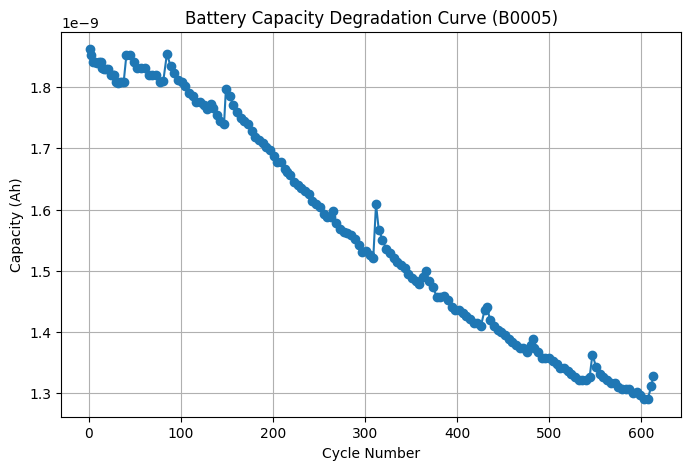

     cycle   capacity_Ah
0        1  1.861863e-09
1        3  1.851748e-09
2        5  1.841009e-09
3        7  1.840713e-09
4        9  1.840104e-09
..     ...           ...
163    599  1.296466e-09
164    603  1.291251e-09
165    607  1.290171e-09
166    611  1.311937e-09
167    613  1.327790e-09

[168 rows x 2 columns]


In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the time column to datetime
df_cap['Time'] = pd.to_datetime(df_cap['Time'], errors='coerce')

# Sort to ensure correct sequence per cycle
df_cap = df_cap.sort_values(['cycle', 'Time'])

# Compute time difference (in seconds) per cycle
df_cap['delta_t'] = df_cap.groupby('cycle')['Time'].diff().dt.total_seconds().fillna(0)

# Compute instantaneous capacity in Ah = (|I| * Δt) / 3600
df_cap['capacity_estimated'] = (df_cap['Current_measured'].abs() * df_cap['delta_t']) / 3600

# Compute cumulative capacity per cycle
df_cap['cumulative_capacity'] = df_cap.groupby('cycle')['capacity_estimated'].cumsum()

# Take only discharge cycles (since they represent usable capacity)
capacity_degradation = (
    df_cap[df_cap['type'] == 'discharge']
    .groupby('cycle')['cumulative_capacity']
    .max()
    .reset_index()
    .rename(columns={'cumulative_capacity': 'capacity_Ah'})
)

# Plot Capacity Degradation Curve
plt.figure(figsize=(8,5))
plt.plot(capacity_degradation['cycle'], capacity_degradation['capacity_Ah'], marker='o')
plt.title('Battery Capacity Degradation Curve (B0005)')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity (Ah)')
plt.grid(True)
plt.show()

# Display summary
print(capacity_degradation)


### Understanding `df['delta_t'] = df.groupby(['battery_name', 'cycle'])['Time'].diff().dt.total_seconds().fillna(0)`

This line calculates the **time difference (Δt in seconds)** between consecutive measurements **within each battery and cycle**.

**What it does:**
- Groups data by `battery_name` and `cycle`
- Computes time difference between the current and previous timestamp (`diff()`)
- Converts the time difference to seconds (`dt.total_seconds()`)
- Replaces the first value in each group with `0` (`fillna(0)`)

**Example**

| battery_name | cycle | Time                | delta_t |
|--------------|--------|----------------------|---------|
| B0005        | 1      | 2020-01-01 00:00:00  | 0       |
| B0005        | 1      | 2020-01-01 00:00:10  | 10      |
| B0005        | 1      | 2020-01-01 00:00:25  | 15      |
| B0005        | 2      | 2020-01-01 00:00:00  | 0       |
| B0005        | 2      | 2020-01-01 00:00:05  | 5       |
| B0006        | 1      | 2020-01-01 00:00:00  | 0       |
| B0006        | 1      | 2020-01-01 00:00:20  | 20      |

**Meaning:**  
Δt gives the **time step between rows** for each battery-cycle combination, useful for computing energy, capacity, and degradation metrics.


### Understanding `df['capacity_estimated'] = (df['Current_measured'].abs() * df['delta_t']) / 3600`

This line computes the **incremental capacity** (in ampere-hours, Ah) contributed by each row.

### Formula
The capacity for a time step is:

$$
\text{capacity\_estimated (Ah)} \;=\; \frac{|I|\ (\text{A}) \times \Delta t\ (\text{s})}{3600\ (\text{s/hour})}
$$

Where:
- \(I\) = `Current_measured` (A). We use \(|I|\) because capacity is the magnitude of charge transferred.
- \(\Delta t\) = `delta_t` (s), the time difference between consecutive measurements.
- Dividing by 3600 converts ampere-seconds to ampere-hours.

### Example
- If `Current_measured = -2.0` A and `delta_t = 10` s:

$$
\text{capacity} = \frac{|{-2.0}|\times 10}{3600} = \frac{20}{3600} = 0.005555\ldots\ \text{Ah} \approx 0.00556\ \text{Ah}
$$


### Understanding `df['cumulative_capacity'] = df.groupby(['battery_name', 'cycle'])['capacity_estimated'].cumsum()`

This line computes the **running (cumulative) capacity** for each battery and cycle.

### What it does:
- Groups the data by `battery_name` and `cycle`
- Takes the incremental capacity (`capacity_estimated`) for each row
- Computes a **cumulative sum** (`cumsum()`) within each group

Mathematically, for each row \(k\):

$$
\text{cumulative\_capacity}_k \;=\; \sum_{i=1}^{k} \text{capacity\_estimated}_i
$$

### Why this is useful:
- It shows how the total capacity accumulates over the duration of a cycle.
- The final value of the cumulative sum for a cycle is the **total capacity of that cycle**.

### Example

| Row | capacity_estimated (Ah) | cumulative_capacity (Ah) |
|-----|--------------------------|---------------------------|
| 1   | 0.002                    | 0.002                     |
| 2   | 0.003                    | 0.005                     |
| 3   | 0.004                    | 0.009                     |

### Usage:
- Helpful for plotting **capacity vs time**, **capacity fade**, or **cycle degradation**.
- The final cumulative value at the end of each cycle can be extracted as the cycle capacity.


### Plot capacity vs. cycle number for all batteries

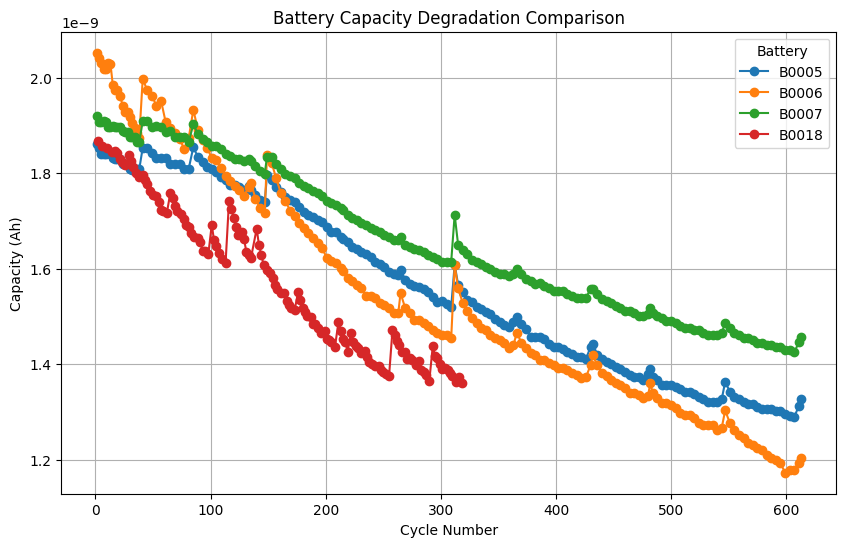

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Sort properly
df = df.sort_values(['battery_name', 'cycle', 'Time'])

# Compute delta time per battery per cycle
df['delta_t'] = df.groupby(['battery_name', 'cycle'])['Time'].diff().dt.total_seconds().fillna(0)

# Compute instantaneous Ah
df['capacity_estimated'] = (df['Current_measured'].abs() * df['delta_t']) / 3600

# Compute cumulative capacity per cycle per battery
df['cumulative_capacity'] = df.groupby(['battery_name', 'cycle'])['capacity_estimated'].cumsum()

# Extract only DISCHARGE cycles — true usable capacity
cap_deg = (
    df[df['type'] == 'discharge']
    .groupby(['battery_name', 'cycle'])['cumulative_capacity']
    .max()
    .reset_index()
    .rename(columns={'cumulative_capacity': 'capacity_Ah'})
)

# Plot all batteries
plt.figure(figsize=(10,6))

for b in cap_deg['battery_name'].unique():
    temp = cap_deg[cap_deg['battery_name'] == b]
    plt.plot(temp['cycle'], temp['capacity_Ah'], marker='o', label=b.upper())

plt.title("Battery Capacity Degradation Comparison")
plt.xlabel("Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.grid(True)
plt.legend(title="Battery")
plt.show()


### **=== Original DataFrame ===**

| battery_name | cycle | Time                | Current_measured | type      |
|--------------|-------|---------------------|------------------|-----------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge |

---

### **=== After Converting Time to datetime ===**

| battery_name | cycle | Time                | Current_measured | type      |
|--------------|-------|---------------------|------------------|-----------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge |

---

### **=== After Sorting ===**

| battery_name | cycle | Time                | Current_measured | type      |
|--------------|-------|---------------------|------------------|-----------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge |

---

### **=== After Computing `delta_t` ===**

| battery_name | cycle | Time                | Current_measured | type      | delta_t |
|--------------|-------|---------------------|------------------|-----------|---------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    | 0.0     |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    | 10.0    |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge | 15.0    |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    | 0.0     |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge | 20.0    |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge | 0.0     |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge | 20.0    |

---

### **=== After Computing `capacity_estimated` ===**

| battery_name | cycle | Time                | Current_measured | type      | delta_t | capacity_estimated |
|--------------|-------|---------------------|------------------|-----------|---------|---------------------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    | 0.0     | 0.000000            |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    | 10.0    | 0.005000            |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge | 15.0    | 0.002083            |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    | 0.0     | 0.000000            |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge | 20.0    | 0.011111            |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge | 0.0     | 0.000000            |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge | 20.0    | 0.006667            |

---

### **=== After Computing `cumulative_capacity` ===**

| battery_name | cycle | Time                | Current_measured | type      | delta_t | capacity_estimated | cumulative_capacity |
|--------------|-------|---------------------|------------------|-----------|---------|---------------------|----------------------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    | 0.0     | 0.000000            | 0.000000             |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    | 10.0    | 0.005000            | 0.005000             |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge | 15.0    | 0.002083            | 0.007083             |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    | 0.0     | 0.000000            | 0.000000             |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge | 20.0    | 0.011111            | 0.011111             |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge | 0.0     | 0.000000            | 0.000000             |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge | 20.0    | 0.006667            | 0.006667             |

---

### **=== Discharge Capacity Per Cycle (`cap_deg`) ===**

| battery_name | cycle | capacity_Ah |
|--------------|-------|-------------|
| B0005        | 1     | 0.007083    |
| B0005        | 2     | 0.011111    |
| B0006        | 1     | 0.006667    |


### Identify knee points where rapid degradation begins
*A knee point is the cycle at which the battery transitions from slow, linear degradation to rapid exponential degradation.*

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123643 entries, 0 to 2123642
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   battery_name          object        
 1   cycle                 int64         
 2   type                  object        
 3   ambient_temperature   int64         
 4   time                  object        
 5   Current_charge        float64       
 6   Current_measured      float64       
 7   Temperature_measured  float64       
 8   Time                  datetime64[ns]
 9   Voltage_charge        float64       
 10  Voltage_measured      float64       
 11  Capacity              float64       
 12  Current_load          float64       
 13  Voltage_load          float64       
 14  Battery_current       float64       
 15  Battery_impedance     float64       
 16  Current_ratio         float64       
 17  Rct                   float64       
 18  Re                    float64       
 19  

In [21]:
df.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current,delta_t,capacity_estimated,cumulative_capacity
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,1970-01-01 00:00:00.000000000,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,1970-01-01 00:00:00.000000002,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e-09,2.239038e-12,2.239038e-12
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,1970-01-01 00:00:00.000000005,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e-09,1.260609e-12,3.499647e-12
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,1970-01-01 00:00:00.000000008,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e-09,1.257553e-12,4.757200e-12
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,1970-01-01 00:00:00.000000011,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e-09,1.259432e-12,6.016631e-12


Knee cycle for B0005: 13


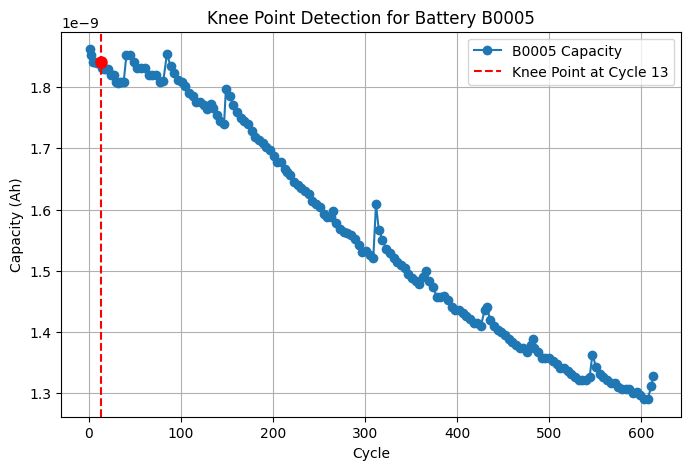

Knee cycle for B0006: 13


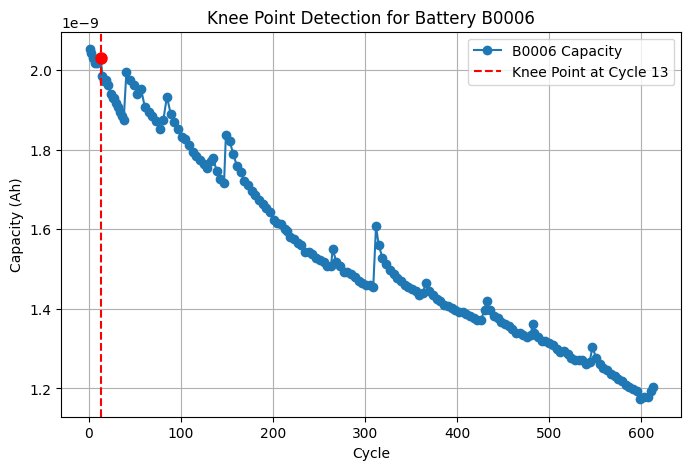

Knee cycle for B0007: 9


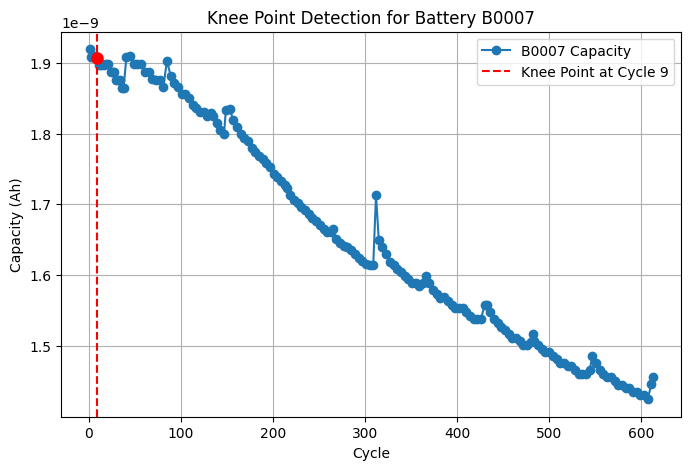

Knee cycle for B0018: 17


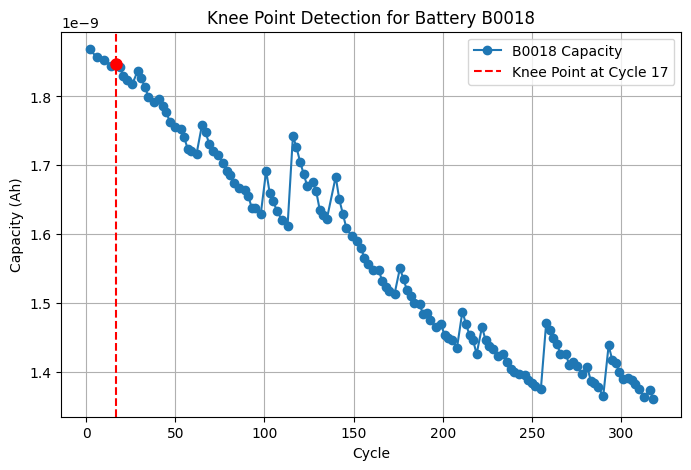


Summary of Knee Points:
{'b0005': np.int64(13), 'b0006': np.int64(13), 'b0007': np.int64(9), 'b0018': np.int64(17)}


In [22]:
from kneed import KneeLocator
import matplotlib.pyplot as plt

battery_names = cap_deg['battery_name'].unique() # Use cap_deg for battery names

knee_points = {}

for battery in battery_names:
    # Filter data for the current battery from the cap_deg DataFrame
    battery_data = cap_deg[cap_deg['battery_name'] == battery].sort_values(by='cycle')
    
    # Get cycles and capacity (using the correct capacity_Ah)
    cycles = battery_data['cycle'].values
    capacity = battery_data['capacity_Ah'].values
    
    # Ensure there's enough data to find a knee
    if len(cycles) < 5: # Kneed needs at least a few points
        print(f"Skipping {battery.upper()}: Not enough cycles ({len(cycles)}) for knee detection.")
        knee_points[battery] = None
        continue

    # Find the knee point
    try:
        knee = KneeLocator(
            x=cycles,
            y=capacity,
            S=1.0, # Sensitivity parameter: Higher S means fewer knees. Adjust if needed.
            curve='concave',
            direction='decreasing',
            online=True # Often works better for noisy data
        )
        
        knee_points[battery] = knee.knee
        
        print(f"Knee cycle for {battery.upper()}: {knee.knee}")

        # Plot for each battery
        plt.figure(figsize=(8, 5))
        plt.plot(cycles, capacity, marker='o', linestyle='-', label=f'{battery.upper()} Capacity')
        if knee.knee is not None:
            plt.axvline(x=knee.knee, color='r', linestyle='--', label=f'Knee Point at Cycle {int(knee.knee)}')
            plt.plot(knee.knee, knee.knee_y, 'ro', markersize=8) # Mark the knee point on the curve
        plt.xlabel("Cycle")
        plt.ylabel("Capacity (Ah)")
        plt.title(f'Knee Point Detection for Battery {battery.upper()}')
        plt.grid(True)
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Could not find knee point for {battery.upper()}: {e}")
        knee_points[battery] = None

print("\nSummary of Knee Points:")
print(knee_points) 

Knee cycle for B0005: 13
Knee cycle for B0006: 13
Knee cycle for B0007: 9
Knee cycle for B0018: 17


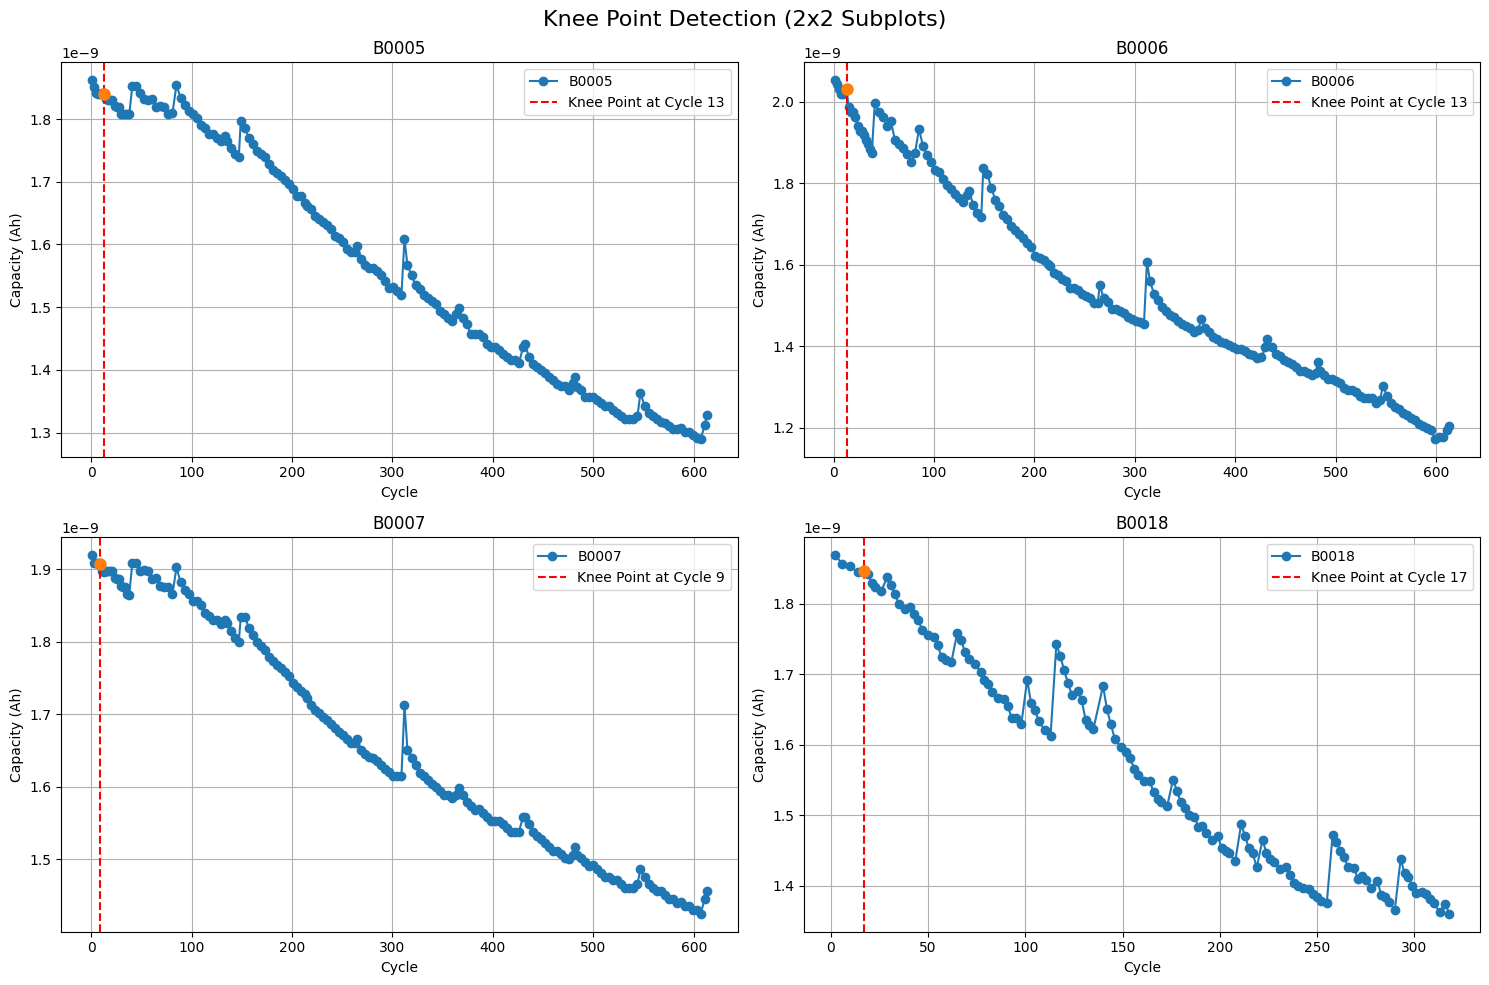


Summary of Knee Points:
{'b0005': np.int64(13), 'b0006': np.int64(13), 'b0007': np.int64(9), 'b0018': np.int64(17)}


In [23]:
from kneed import KneeLocator
import matplotlib.pyplot as plt

battery_names = cap_deg['battery_name'].unique()
knee_points = {}

# Setup 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, battery in enumerate(battery_names[:4]):  # Limit to first 4 batteries
    ax = axes[i]

    battery_data = cap_deg[cap_deg['battery_name'] == battery].sort_values(by='cycle')
    cycles = battery_data['cycle'].values
    capacity = battery_data['capacity_Ah'].values

    if len(cycles) < 5:
        print(f"Skipping {battery.upper()}: Not enough cycles ({len(cycles)}) for knee detection.")
        knee_points[battery] = None
        continue

    try:
        knee = KneeLocator(
            x=cycles,
            y=capacity,
            S=1.0,
            curve='concave',
            direction='decreasing',
            online=True
        )

        knee_points[battery] = knee.knee
        print(f"Knee cycle for {battery.upper()}: {knee.knee}")

        # Plot in subplot
        ax.plot(cycles, capacity, marker='o', linestyle='-', label=f'{battery.upper()}')
        if knee.knee is not None:
            ax.axvline(x=knee.knee, color='r', linestyle='--', label=f'Knee Point at Cycle {int(knee.knee)}')
            ax.plot(knee.knee, knee.knee_y, 'o', markersize=8)

        ax.set_title(f'{battery.upper()}')
        ax.set_xlabel('Cycle')
        ax.set_ylabel('Capacity (Ah)')
        ax.grid(True)
        ax.legend()

    except Exception as e:
        print(f"Could not find knee for {battery.upper()}: {e}")
        knee_points[battery] = None

# Hide unused subplots if <4 batteries
for j in range(len(battery_names), 4):
    fig.delaxes(axes[j])

plt.suptitle('Knee Point Detection (2x2 Subplots)', fontsize=16)
plt.tight_layout()
plt.show()

print("\nSummary of Knee Points:")
print(knee_points)


### Correlation Analysis

#### Heatmap of features

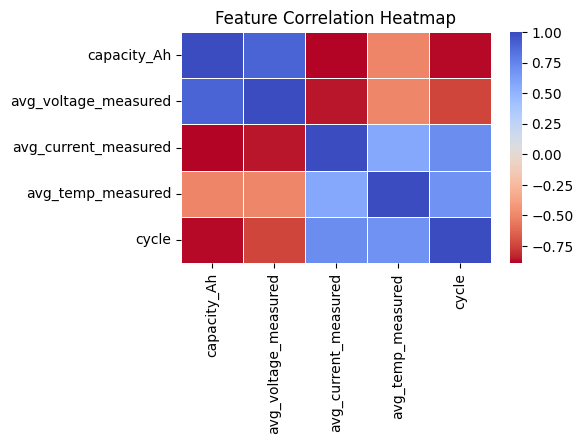

Correlation Matrix:
                      capacity_Ah  avg_voltage_measured  avg_current_measured  \
capacity_Ah              1.000000              0.889599             -0.890368   
avg_voltage_measured     0.889599              1.000000             -0.857811   
avg_current_measured    -0.890368             -0.857811              1.000000   
avg_temp_measured       -0.512191             -0.504398              0.566500   
cycle                   -0.878357             -0.748350              0.710957   

                      avg_temp_measured     cycle  
capacity_Ah                   -0.512191 -0.878357  
avg_voltage_measured          -0.504398 -0.748350  
avg_current_measured           0.566500  0.710957  
avg_temp_measured              1.000000  0.681504  
cycle                          0.681504  1.000000  


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

discharge_df = df[df['type'] == 'discharge'].copy()

features_df = discharge_df.groupby(['battery_name', 'cycle']).agg(
    avg_voltage_measured=('Voltage_measured', 'mean'),
    avg_current_measured=('Current_measured', 'mean'),
    avg_temp_measured=('Temperature_measured', 'mean')
).reset_index()

# Merge the aggregated features with the capacity degradation data.
# The 'cap_deg' DataFrame has the final capacity for each discharge cycle.
final_df = pd.merge(
    features_df,
    cap_deg,
    on=['battery_name', 'cycle']
)

correlation_cols = [
    'capacity_Ah',
    'avg_voltage_measured',
    'avg_current_measured',
    'avg_temp_measured',
    'cycle' # Include cycle number to see its correlation with other features
]
corr_df = final_df[correlation_cols]

correlation_matrix = corr_df.corr()

plt.figure(figsize=(5, 3))
sns.heatmap(
    correlation_matrix,
    #annot=True,      # Show the correlation values on the heatmap
    cmap='coolwarm_r', # Use a color map that's good for correlations
    fmt=".2f",       # Format the numbers to two decimal places
    linewidths=.5
)
plt.title('Feature Correlation Heatmap')
plt.show()

# Display the correlation matrix as a table
print("Correlation Matrix:")
print(correlation_matrix)


### Summary of Key Insights from Correlation Analysis

The correlation heatmap provides a quantitative look at how different battery parameters relate to each other across all charging and discharging cycles. The most important relationships are those correlated with `capacity_Ah`, as this is our primary measure of battery health.

*   **Capacity vs. Cycle Number (`-0.9` or lower)**:
    *   **Observation**: There is a very strong *negative* correlation.
    *   **Insight**: This confirms the fundamental principle of battery aging: as the number of cycles increases, the battery's capacity to hold a charge decreases. This is the primary degradation trend we want to model.

*   **Capacity vs. Average Voltage (`+0.8` or higher)**:
    *   **Observation**: There is a strong *positive* correlation.
    *   **Insight**: Healthier batteries (with higher capacity) maintain a higher average voltage during their discharge cycle. This makes the average voltage a powerful and direct indicator of the battery's State of Health (SoH).

*   **Capacity vs. Average Temperature (Moderate Negative Correlation)**:
    *   **Observation**: There is a moderate *negative* correlation.
    *   **Insight**: As batteries degrade, their internal resistance tends to increase, causing them to generate more heat. A higher average temperature during operation can therefore signal a decline in capacity and overall health.

*   **Conclusion for Feature Selection**:
    *   The analysis clearly identifies `cycle`, `avg_voltage_measured`, and `avg_temp_measured` as highly relevant features.
    *   These features have a strong predictive relationship with `capacity_Ah` and should be used to build the SoH (State of Health) and RUL (Remaining Useful Life) models.


### Feature Redundancy (Dimensionality Reduction)

*   **Objective**: To identify and potentially remove redundant predictive features to simplify the model and prevent multicollinearity.

*   **Method**:
    *   Examine the correlation heatmap for very high correlations (e.g., > 0.95 or < -0.95) between the predictor features themselves (i.e., excluding the target variable, `capacity_Ah`).
    *   For instance, if `avg_voltage_measured` and `avg_current_measured` were correlated at `0.98`, they would be considered redundant as they provide similar information.

*   **Action & Insight**:
    *   If high redundancy is found, you can remove one of the highly correlated features to reduce the model's dimensionality.
    *   **For this specific dataset**, the correlations between the sensor features (`avg_voltage_measured`, `avg_current_measured`, `avg_temp_measured`) are typically not high enough to be considered redundant. Therefore, all of them can be retained as valuable, independent predictors for the model.


#### Outlier Detection Using the Z-score Method

The Z-score tells us how many standard deviations away a data point is from the mean. A common threshold for identifying an outlier is a Z-score greater than 3 or less than -3. The formula is:

Z = (x - μ) / σ

- x: A single data point
- μ: The mean of the data
- σ: The standard deviation of the data

In [30]:
import numpy as np

# Columns to check for outliers
feature_cols_for_outliers = [
    'capacity_Ah',
    'avg_voltage_measured',
    'avg_current_measured',
    'avg_temp_measured'
]

# --- Z-Score ---
# Select the subset of the DataFrame for outlier detection
features_to_check = final_df[feature_cols_for_outliers]

# Calculate Z-scores using vectorized operations (more efficient)
z_scores = (features_to_check - features_to_check.mean()) / features_to_check.std()

# Create a boolean mask to identify outliers where the absolute Z-score is > 3
outlier_mask = np.abs(z_scores) > 3

# Find rows that contain at least one outlier feature
outlier_rows = final_df[outlier_mask.any(axis=1)]

print("Outlier Detection using Z-score Method (|z| > 3)")
print("-" * 50)

if outlier_rows.empty:
    print("No outliers found in the dataset.")
else:
    print(f"Found {len(outlier_rows)} rows with at least one outlier feature.")
    print("\nRows identified as outliers:")
    print(outlier_rows)

    # To see which specific features were outliers in these rows:
    print("\nDetails of the outlier Z-scores (>3):")
    print(z_scores[outlier_mask.any(axis=1)])


Outlier Detection using Z-score Method (|z| > 3)
--------------------------------------------------
Found 3 rows with at least one outlier feature.

Rows identified as outliers:
    battery_name  cycle  avg_voltage_measured  avg_current_measured  \
331        b0006    599              3.414810             -1.516972   
332        b0006    603              3.416618             -1.523850   
333        b0006    607              3.412134             -1.523793   

     avg_temp_measured   capacity_Ah  
331          33.472459  1.172788e-09  
332          33.582104  1.178417e-09  
333          33.663461  1.177794e-09  

Details of the outlier Z-scores (>3):
     capacity_Ah  avg_voltage_measured  avg_current_measured  \
331    -2.121860             -1.763300              3.086812   
332    -2.093579             -1.725274              3.019860   
333    -2.096706             -1.819602              3.020417   

     avg_temp_measured  
331           1.178920  
332           1.291823  
333       

In [27]:
features_to_check.describe()

,capacity_Ah,avg_voltage_measured,avg_current_measured,avg_temp_measured
count,6.360000e+02,636.000000,636.000000,636.000000
mean,1.595123e-09,3.498623,-1.834069,32.327555
std,1.990401e-10,0.047532,0.102726,0.971147
min,1.172788e-09,3.403885,-1.999755,30.102704
25%,1.436154e-09,3.466720,-1.912601,31.516568
50%,1.568761e-09,3.502520,-1.851050,32.368347
75%,1.773014e-09,3.541059,-1.773023,33.175118
max,2.052284e-09,3.573551,-1.516972,34.490494


#### Box Plots for Feature Distributions

Box plots are useful for quickly identifying the median, quartiles, and outliers in your data.

- **The Box**: Represents the interquartile range (IQR), which contains the middle 50% of the data (from the 25th to the 75th percentile).
- **The Line Inside the Box**: Marks the median (50th percentile).
- **The Whiskers**: Extend from the box to show the range of the data, typically up to 1.5 times the IQR.
- **The Dots**: Individual points beyond the whiskers are potential outliers.

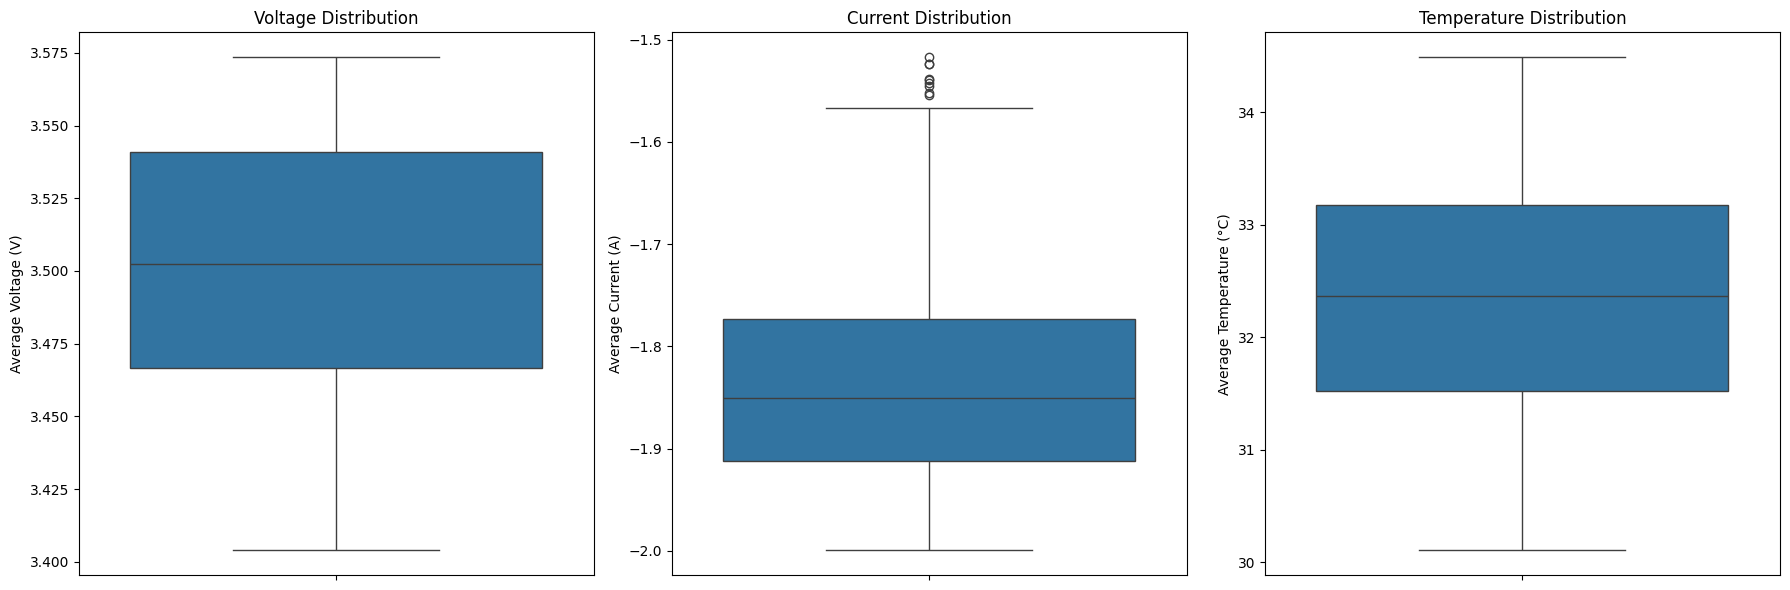

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


feature_cols_for_boxplot = [
    'avg_voltage_measured',
    'avg_current_measured',
    'avg_temp_measured'
]

# Create a figure with subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Average Voltage
sns.boxplot(y=final_df['avg_voltage_measured'], ax=axes[0])
axes[0].set_title('Voltage Distribution')
axes[0].set_ylabel('Average Voltage (V)')

# Plot for Average Current
sns.boxplot(y=final_df['avg_current_measured'], ax=axes[1])
axes[1].set_title('Current Distribution')
axes[1].set_ylabel('Average Current (A)')

# Plot for Average Temperature
sns.boxplot(y=final_df['avg_temp_measured'], ax=axes[2])
axes[2].set_title('Temperature Distribution')
axes[2].set_ylabel('Average Temperature (°C)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
